v012 : 테스트 데이터 생성 & 로지스틱 회귀

v013 : applied tinrtgu's idea to this test dataset

v014 : implementing ADF, 구현 완료 했고, 테스트 데이터에 적용해 봄.

###### I'v made test data and result of logistic regression of this dataset. I'll use this data to check result of further development.

###### - Creating data structure to generate test data conveniently.

In [116]:
import pandas as pd
import numpy as np

class Node: 
    def __init__(self): 
        self.data = None # Variable to store 'list'
        self.length = None # Length of the list
        self.next = None # Next node
        self.prev = None # Previous Node
        self.current_index = None # Index of current value of my list.

    def __str__(self): 
        return str(self.data)
    
    def get_cur_value(self):
        return self.data[self.current_index] # Returns current value of my list.

    def increse_index(self):
        overflow_flag = False # flag to show if current_index is indicating last value of my list.

        if((self.current_index + 1) == self.length): # Check if current_index is indicating the last value of my node.
            self.current_index = 0 # Resetting the current_index
            overflow_flag = True
            if(self.prev is not None):
                self.prev.increse_index() # Propagating the overflow to previous node.
        else:
            self.current_index += 1
        
        return overflow_flag
            
    
class Linked_list:
    
    def __init__(self):
        self.head_node = None
        self.tail_node = None
        self.num_node = 0
    
    def add_first(self, data):
        #create a new node
        new_node = Node()
        new_node.data = data
        new_node.length = len(data)
        new_node.current_index = 0
        
        if(self.head_node):
            new_node.next = self.head_node
            self.head_node.prev = new_node
        else:
            self.tail_node = new_node
            
        self.head_node = new_node
        Linked_list.num_node += 1
    
    def add_last(self, data):
        #create a new node
        new_node = Node()
        new_node.data = data
        new_node.length = len(data)
        new_node.current_index = 0
        
        if(self.head_node):
            new_node.prev = self.tail_node
            self.tail_node.next = new_node
        else:
            self.head_node = new_node
            
        self.tail_node = new_node
        self.num_node += 1
        
    def list_print(self):
        node = self.head_node
        while node:
            print(node.data)
            node = node.next

    def get_current_record(self):
        node = self.head_node
        return_list = []
        while node:
            return_list = return_list + [node.get_cur_value()]
            node = node.next
        return return_list
    
    def get_number_of_total_combination(self):
        total = 1
        node = self.head_node
        while(node):
            total *= node.length
            node = node.next
        return total
    
    def get_df_one(self, times=1):
        stri = [str(i) for i in list(range(1, self.num_node))]
        col_names = ["y"] + ["x" + s for s in stri]

        df = pd.DataFrame(columns = col_names)
        tot = self.get_number_of_total_combination() * times

        for i in range(tot):
            record = self.get_current_record()
            df = df.append(pd.Series(record, index = col_names), ignore_index=True)
            self.tail_node.increse_index()
        return df


Skeleton linked-list having all category values.

In [117]:
l1 = Linked_list()
l1.add_last([1, 0])
l1.add_last(['a1', 'a2', 'a3'])
l1.add_last(['b1', 'b2', 'b3'])

Linked-list for $y=0$

In [118]:
l2 = Linked_list()
l2.add_last([0])
l2.add_last(['a1', 'a2'])
l2.add_last(['b1', 'b2'])

Linked-list for $y=1$

In [119]:
l3 = Linked_list()
l3.add_last([1])
l3.add_last(['a2', 'a3'])
l3.add_last(['b3'])

###### Generating training data from 3 linked-list created earlier.

In [120]:
df1 = l1.get_df_one(1)
df2 = l2.get_df_one(10)
df3 = l3.get_df_one(20)

df_train = df1.append(df2).append(df3)
df_train = df_train.reset_index(drop=True)

df_train.to_csv('./mycsv.csv')


dummy_x1 = pd.get_dummies(df_train['x1'], prefix='x1')
dummy_x2 = pd.get_dummies(df_train['x2'], prefix='x2')

data_train = df_train[['y']].join(dummy_x1.ix[:,'x1_a2':]).join(dummy_x2.ix[:,'x2_b2':])
data_train['intercept'] = 1.0
data_train = data_train.reset_index(drop=True)

In [121]:
data_train.head(5)

,y,x1_a2,x1_a3,x2_b2,x2_b3,intercept
0,1,0,0,0,0,1
1,1,0,0,1,0,1
2,1,0,0,0,1,1
3,1,1,0,0,0,1
4,1,1,0,1,0,1


Generating test data from 3 linked-list created earlier with different frequency.

In [122]:
df1_ = l1.get_df_one(1)
df2_ = l2.get_df_one(2)
df3_ = l3.get_df_one(5)

df_test = df1_.append(df2_).append(df3_)
df_test = df_test.reset_index(drop=True)

dummy_x1_ = pd.get_dummies(df_test['x1'], prefix='x1')
dummy_x2_ = pd.get_dummies(df_test['x2'], prefix='x2')

data_test = df_test[['y']].join(dummy_x1_.ix[:,'x1_a2':]).join(dummy_x2_.ix[:,'x2_b2':])
data_test['intercept'] = 1.0
data_test = data_test.reset_index(drop=True)

In [123]:
data_test.head(5)

,y,x1_a2,x1_a3,x2_b2,x2_b3,intercept
0,1,0,0,0,0,1
1,1,0,0,1,0,1
2,1,0,0,0,1,1
3,1,1,0,0,0,1
4,1,1,0,1,0,1


shuffling data 

In [124]:
df_train = df_train.reindex(np.random.permutation(df_train.index))
df_train = df_train.reset_index(drop=True)

df_test = df_test.reindex(np.random.permutation(df_test.index))
df_test = df_test.reset_index(drop=True)

Model fitting with logistic regression model

In [125]:
import statsmodels.api as sm

logit = sm.Logit(data_train['y'], data_train.ix[:,'x1_a2':])
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.280984
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   98
Model:                          Logit   Df Residuals:                       93
Method:                           MLE   Df Model:                            4
Date:                Tue, 12 Jan 2016   Pseudo R-squ.:                  0.5946
Time:                        20:06:10   Log-Likelihood:                -27.536
converged:                       True   LL-Null:                       -67.928
                                        LLR p-value:                 1.188e-16
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1_a2          0.8659      0.927      0.934      0.350        -0.951     2.683
x1_a3          2.3049      1.

###### Getting predicted success probability and SSE using training data. 

In [126]:
predicted = result.predict(data_train.ix[:,'x1_a2':])
actual = data_train['y']

import numpy as np
SSE = sum((np.array(predicted) - np.array(actual))**2)
SSE

7.4386847041540758

###### Getting predicted success probability and SSE using test data. 

In [127]:
predicted = result.predict(data_test.ix[:,'x1_a2':])
actual = data_test['y']

import numpy as np
SSE = sum((np.array(predicted) - np.array(actual))**2)
SSE

6.9801424285949789

###### Computing log-loss using train data.

In [130]:
predicted = result.predict(data_train.ix[:,'x1_a2':])
actual = data_train['y']

from datetime import datetime
from csv import DictReader
from math import exp, log, sqrt


def logloss(p, y):
    p = max(min(p, 1. - 10e-12), 10e-12)
    return -log(p) if y == 1. else -log(1. - p)

loss_list = [0]
loss = 0
for i in range(len(actual)):
    LL = logloss(predicted[i], actual[i])
    loss += LL
    loss_list.append(loss/(i+1))
loss


27.53640875884006

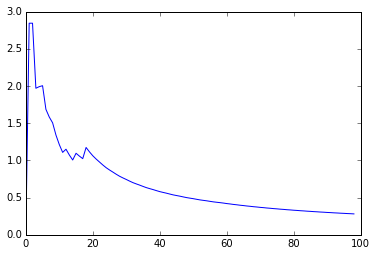

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(loss_list)

###### Computing log-loss using test data.

In [136]:
predicted = result.predict(data_test.ix[:,'x1_a2':])
actual = data_test['y']

from datetime import datetime
from csv import DictReader
from math import exp, log, sqrt


def logloss(p, y):
    p = max(min(p, 1. - 10e-12), 10e-12)
    return -log(p) if y == 1. else -log(1. - p)

loss_list = [0]
loss = 0
for i in range(len(actual)):
    LL = logloss(predicted[i], actual[i])
    loss += LL
    loss_list.append(loss/(i+1))
loss


22.533914895676304

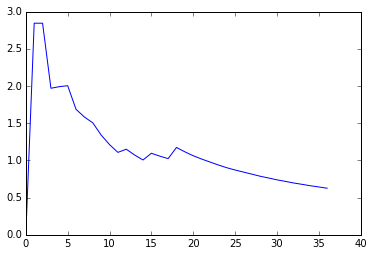

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(loss_list)

----------------------------------------------------------


# **tinrtgu's idea below**

In [138]:
def get_x_dic(df_train, row_num):
    keys = list(df_train.columns.values)
    values = list(df_train.ix[row_num])
    x_dic = {}
    for i in range(len(keys)):
        x_dic[keys[i]] = values[i]
    return x_dic

In [139]:
from datetime import datetime
from csv import DictReader
from math import exp, log, sqrt

D = 2 ** 6   # number of weights use for learning
alpha = .75    # learning rate for sgd optimization

In [140]:
def logloss(p, y):
    p = max(min(p, 1. - 10e-12), 10e-12)
    return -log(p) if y == 1. else -log(1. - p)

In [141]:
def get_x(csv_row, D):
    x = [0]  # 0 is the index of the bias term
    for key, value in csv_row.items():
        index = int(value + key[1:], 16) % D  # weakest hash ever ;)
        x.append(index)
    return x  # x contains indices of features that have a value of 1

In [142]:
def get_p(x, w):
    wTx = 0.
    for i in x:  # do wTx
        wTx += w[i] * 1.  # w[i] * x[i], but if i in x we got x[i] = 1.
    return 1. / (1. + exp(-max(min(wTx, 20.), -20.)))  # bounded sigmoid

In [143]:
def update_w(w, n, x, p, y):
    for i in x:
        # alpha / (sqrt(n) + 1) is the adaptive learning rate heuristic
        # (p - y) * x[i] is the current gradient
        # note that in our case, if i in x then x[i] = 1
        w[i] -= (p - y) * alpha / (sqrt(n[i]) + 1.)
        n[i] += 1.

    return w, n

###### Fitting for train data

In [144]:
# initialize our model
w = [0.] * D  # weights
n = [0.] * D  # number of times we've encountered a feature

# start training a logistic regression model using on pass sgd
loss = 0.
loss_list = [0]

for i in range(len(df_train)):
    row = get_x_dic(df_train, i)
    
    y = 1. if row['y'] == 1 else 0.
    del row['y']
    
    x = get_x(row, D)
    
    p = get_p(x, w)
    
    LL = logloss(p, y)
    loss += LL
    loss_list.append(loss/(i+1))
    
    w, n = update_w(w, n, x, p, y)

w
loss

38.25152646276632

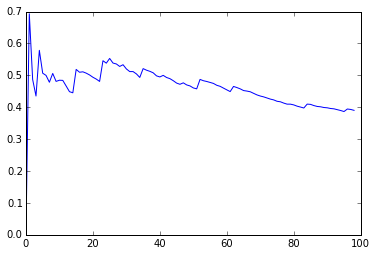

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(loss_list)

Testing

In [146]:
row = get_x_dic(df_train, 17)
print(row)
del row['y']
get_p(get_x(row, D), w)

{'y': 0.0, 'x2': 'b2', 'x1': 'a2'}


0.22298796057638157

###### Predicting for test data

In [147]:
loss = 0.
loss_list = [0]

for i in range(len(df_test)):
    row = get_x_dic(df_test, i)
    
    y = 1. if row['y'] == 1 else 0.
    del row['y']
    
    x = get_x(row, D)
    p = get_p(x, w)
    
    LL = logloss(p, y)
    loss += LL
    
    loss_list.append(loss/(i+1))
    
loss


19.846040936514083

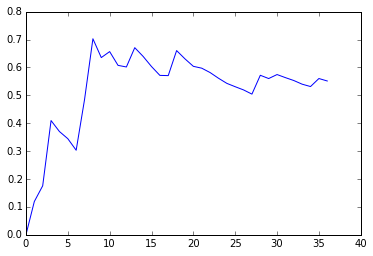

In [148]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(loss_list)

--------

### **We will implement ADF for online learning based on tinrtgu's code.**

In [149]:
# Function getting dictinary of each row.
#
# Input : whole data-frame, row number (0~)
# Output : Dictinary containing data of indicated row.

def get_x_dic(df_train, row_num):
    keys = list(df_train.columns.values)
    values = list(df_train.ix[row_num])
    x_dic = {}
    for i in range(len(keys)):
        x_dic[keys[i]] = values[i]
    return x_dic

In [150]:
from datetime import datetime
from csv import DictReader
from math import exp, log, sqrt

D = 2 ** 6   # number of weights use for learning


In [151]:
def logloss(p, y):
    p = max(min(p, 1. - 10e-12), 10e-12)
    return -log(p) if y == 1. else -log(1. - p)

In [152]:
def get_x(csv_row, D):
    x = [0]  # 0 is the index of the bias term
    for key, value in csv_row.items():
        index = int(value + key[1:], 16) % D  # weakest hash ever ;)
        x.append(index)
    return x  # x contains indices of features that have a value of 1

**1. Posterior distribution of** $s_t$, $q_t(s_t)$
$$
\begin{align}
q_t(s_t) &= N(s_t; \tilde{m}_t, \tilde{v}_t)
\\ \tilde{m}_t &= \frac{1}{\tilde{z}_t} \sum_i \chi_i f(y_t; \chi_i ) \omega_i
\\ \tilde{v}_t &= \frac{1}{\tilde{z}_t} \sum_i \chi^2_i f(y_t; \chi_i ) \omega_i - \tilde{m}^2_t
\\ \tilde{z}_t &= \sum_i f(y_t; \chi_i ) \omega_i
\\ f(y_t;\chi_i) &= \left(\frac{1}{1+exp(-\chi_i)}\right)^{y_t} \left(\frac{exp(-\chi_i)}{1+exp(-\chi_i)}\right)^{(1-y_t)} \quad \mathrm{for}  \ \ y_t \in \{0,1\}
\end{align}
$$


In [153]:
import numpy as np

n = 10
xxi, wwi = np.polynomial.hermite.hermgauss(n)

# Function getting updated distribution of s_t
# Input: 
# Output: 
def get_s_t_new(y, s_t_m_old, s_t_v_old):

    #s_t_old = 1. # mean of sum node at t-1
    #s_v_old = 10 # variance of sum node at t-1

    wi = wwi / np.sqrt(np.pi)
    xi = xxi * np.sqrt(2) * np.sqrt(s_t_v_old) + s_t_m_old

    
    fw = 0
    if(y==1):
        fw = (1 / (1 + np.exp(-xi))) * wi
    elif(y==0):
        fw = ((np.exp(-xi)) / (1 + np.exp(-xi))) * wi
    else:
        print("error, y has wroing value")
    #fw = (1 / (1 + np.exp(-xi))) * wi
    
    z_t = sum(fw)

    s_t_m_new = 1/z_t * sum(xi * fw)
    
    s_t_v_new = 1/z_t * sum((xi**2) * fw) - s_t_m_new**2
        
    return (s_t_m_new, s_t_v_new)


**2. Approximated posterior distribution of** $\theta$

First, we can define $\delta_{\mu}$ and $\delta_{\sigma^2}$ as change in $m_t$ and $m_t$ after updating the distribution of $s_t$.
$$m_t = m_{t|t-1} + \delta_{m}$$
$$v_t = v_{t|t-1} + \delta_{v}$$

Using these $\delta$, parameters of factored posterior distribution can be demonstrated to be as follows:

$$
\begin{align}
   q(\theta_t,i) &\sim N(\theta_{t,i};\mu_{t,i}, \sigma^2_{t,i})
\\ \mu_{t,i} &= \mu_{t|t-1,i} + a_i \delta_m
\\ \sigma^2_{t,i} &= \sigma^2_{t|t-1,i} + a^2_i \delta_v
\\ a_i &\triangleq \frac{x_{t,i}\sigma^2_{t|t-1,i}}{\sum_j x^2_{t,j}\sigma^2_{t|t-1,i}}
\end{align}
$$

($\triangleq$: equal by definition.)


In [154]:
# We are using all categorical variables, and all of them 0 or 1, so we need only update mu, sigma of theta whose x value is 1.

def get_a_i(x, theta_t_v):
    #return theta_t_v[x] / sum(theta_t_v[x]**2)
    return theta_t_v[x] / sum(theta_t_v[x])
    #return theta_t_v[x] / sum(theta_t_v)


In [155]:
theta_t_m = np.array([0.] * D) # mean of thetas at t
theta_t_v = np.array([10.] * D) # std of thetas at t

def update_theta(x, theta_t_m, theta_t_v, delta_m, delta_v):
    a_i = get_a_i(x, theta_t_v)
    theta_t_m[x] += (a_i * delta_m)
    theta_t_v[x] += ((a_i**2) * delta_v)


In [156]:
# initialize our model
theta = [0.] * D  # weights

theta_t_m = np.array([0.] * D) # mean of thetas at t
theta_t_v = np.array([100.] * D) # variance of thetas at t
s_t_m = 0. # mean of sum node at t
s_t_v = 100 # variance of sum node at t

loss = 0.
loss_list = [0]

for i in range(len(df_train)):
    row = get_x_dic(df_train, i)
    #y_old = y #added for test
    y = 1. if row['y'] == 1 else 0.
    del row['y']
    x = get_x(row, D)
    
    #s_t_m_old, s_t_v_old = s_t_m, s_t_v
    #s_t_m, s_t_v = get_s_t_new(y, s_t_m_old, s_t_v_old)

    #if(i==0):
    #    s_t_m_old = 0. # mean of sum node at t
    #    s_t_v_old = 10 # variance of sum node at t
    #    s_t_m, s_t_v = get_s_t_new(y, s_t_m_old, s_t_v_old)
    #else:
    #    s_t_m_old = sum(theta_t_m[x]) # mean of sum node at t
    #    s_t_v_old = sum(theta_t_v[x]) # variance of sum node at t
    #    s_t_m, s_t_v = get_s_t_new(y, s_t_m_old, s_t_v_old)
        
    s_t_m_old = sum(theta_t_m[x]) # mean of sum node at t
    s_t_v_old = sum(theta_t_v[x]) # variance of sum node at t
    s_t_m, s_t_v = get_s_t_new(y, s_t_m_old, s_t_v_old)
    
    delta_m = s_t_m - s_t_m_old
    delta_v = s_t_v - s_t_v_old
    
    #print(i, '(m:', delta_m, '), (v:', delta_v, ')')
    
    update_theta(x, theta_t_m, theta_t_v, delta_m, delta_v)
    
    p = get_p(x, theta_t_m)
    LL = logloss(p, y)
    loss += LL
    loss_list.append(loss/(i+1))

loss

8.79067922455117

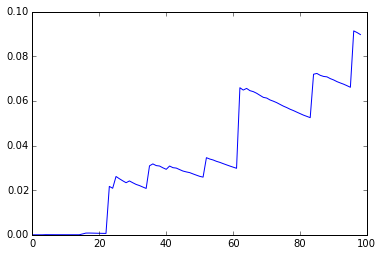

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(loss_list)

In [158]:
loss = 0.
loss_list = [0]

for i in range(len(df_test)):
    
    row = get_x_dic(df_test, i)
    y = 1. if row['y'] == 1 else 0.
    del row['y']
    x = get_x(row, D)
    
    p = get_p(x, theta_t_m)
    LL = logloss(p, y)
    loss += LL
    loss_list.append(loss/(i+1))
    
loss

42.617051933886295

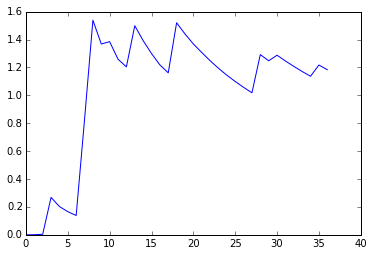

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(loss_list)

In [160]:
SSE = 0
for i in range(len(df_train)):
    
    row = get_x_dic(df_train, i)
    actual = row['y']
    del row['y']
    x = get_x(row, D)
    predicted = get_p(x, theta_t_m)
    SSE += (actual - predicted)**2

SSE
    


7.9445831545897061

In [161]:
SSE = 0
for i in range(len(df_test)):

    row = get_x_dic(df_test, i)
    actual = row['y']
    del row['y']
    x = get_x(row, D)
    predicted = get_p(x, theta_t_m)
    SSE += (actual - predicted)**2

SSE
    


7.9405492504966082